# Dataset : Flu clinics 

This dataset contains all the flu clinics offered in the city of Chicago in collaboration with the departement of public Health starting form 2014. 

## 1.Loading/Overview

In [108]:
import pandas as pd
import numpy as np
import request
from pathlib import Path
import matplotlib.pyplot as plt

In [109]:
data_path = Path('data')

In [110]:
flu_clinics = pd.read_csv(data_path/'fluu.csv')

In [111]:
flu_clinics.shape

(1862, 27)

We have in total 1862 flu clinics. Lets now have a look at the data columns of our data

In [112]:
flu_clinics.columns

Index(['Season', 'Facility ID', 'Latitude', 'Longitude', 'Street1', 'Street2',
       'City', 'State', 'Postal Code', 'Country', 'Facility Name', 'URL',
       'Phone', 'Contact', 'Begin Date', 'End Date', 'Begin Time', 'End Time',
       'Begin DateTime', 'End DateTime', 'Recurrence Days', 'Hours',
       'Eligibility', 'Cost', 'Notes', 'Record ID', 'Location'],
      dtype='object')

In [113]:
print(flu_clinics.dtypes)

Season              object
Facility ID          int64
Latitude           float64
Longitude          float64
Street1             object
Street2             object
City                object
State               object
Postal Code          int64
Country             object
Facility Name       object
URL                 object
Phone               object
Contact             object
Begin Date          object
End Date            object
Begin Time          object
End Time            object
Begin DateTime      object
End DateTime        object
Recurrence Days     object
Hours               object
Eligibility         object
Cost                object
Notes               object
Record ID           object
Location            object
dtype: object


In [114]:
flu_clinics['Recurrence Days'].iloc[0]

'Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday'

Here is the description of the data 

- **Facility name** (String): The name of the facility providing flu vaccinations.
- **Facility ID** (Number): The unique identifier for the facility providing flu vaccinations.
- **Facility type** (String): Denotes the type of facility providing flu vaccinations.
- **Street1** (String): The street address of the facility providing flu vaccinations.
- **Street2** (String): Supplementary street address information of the facility providing flu vaccinations.
- **City** (String): The city of the facility providing flu vaccinations.
- **State** (String): The state or province of the facility providing flu vaccinations.
- **Postal Code** (String): The postal code of the facility providing flu vaccinations.
- **Country** (String): The country of the facility providing flu vaccinations. (ISO 3166-1 alpha-2 format)
- **Latitude** (decimal): The latitude of the facility providing flu vaccinations. (Value in decimal degrees to an accuracy of no less than 5 decimal places)

- **Longitude** (decimal):The longitude of the facility providing flu vaccinations. (Value in decimal degrees to an accuracy of no less than 5 decimal places)
- **Phone** (String): A contact phone number for the facility providing flu vaccinations.
- **Contact** (String): The name of a contact person for the facility providing flu vaccinations.
- **URL** (String): A website providing additional information about the business or entity administering flu vaccinations.
- **Begin DateTime** (date): The date on which vaccinations begin at a specified location. (ISO 8601 format)
- **End DateTime** (date): The date on which vaccinations end at a specified location. (ISO 8601 format)
- **Begin Time** (time): The local time at which vaccinations begin being dispensed at a specified location. (ISO 8601 format)
- **End Time** (time): The local time at which vaccinations begin being dispensed at a specified location. (ISO 8601 format)
- **Eligibility** (String): Limitations on eligibility for vaccinations at a specific location.
- **Notes** (String): List of any documents or documentation that might be needed to receive vaccination. Use the pipe (‘|’) delimiter to separate document names if multiple documents are required.
- **Location** (decimal): Longitude and Latiude
- **Cost** (decimal): The cost for vaccinations at a specified location (if any).
- **Season** (String): Season when is was given 
- **Record ID** (String): An id for the record (unique)
- **Recurrence Days** (String): Which day of the week it was given

As we can see we have a lot of information for each of the flu clinics. This will allow us to have a multitude of different analysis.

## 2.Cleaning

In [115]:
flu_clinics_init = flu_clinics.copy() # storing a copy of the original df

First of all, ther are some columns that are cleary not relevant

- **Contact, URL, ELigibility, Record ID, Phone** : Clearly we have no use for them
- **Location** : It is redundant as we already have columns Longitude and Latitude

In [116]:
to_drop = ['Contact', 'URL', 'Eligibility', 'Record ID', 'Phone', 'Location']

In [117]:
flu_clinics = flu_clinics.drop(columns=to_drop)

Now we need to look at the missing values and what to do with them

In [118]:
flu_clinics.isnull().mean() 

Season             0.000000
Facility ID        0.000000
Latitude           0.000000
Longitude          0.000000
Street1            0.000000
Street2            0.988185
City               0.000000
State              0.000000
Postal Code        0.000000
Country            0.000000
Facility Name      0.000000
Begin Date         0.000000
End Date           0.000000
Begin Time         0.769603
End Time           0.769603
Begin DateTime     0.769603
End DateTime       0.769603
Recurrence Days    0.000000
Hours              0.230397
Cost               0.081633
Notes              0.752417
dtype: float64

Notes, Street2, and the Begin and End Time and DateTime can be dropped as they have too over 75% of missing values

In [119]:
to_drop_m = ['Street2', 'Notes', 'Begin Date', 'End Date', 'Begin DateTime', 'End DateTime', 'Begin Time', 'End Time']

In [120]:
flu_clinics = flu_clinics.drop(columns=to_drop_m)

We cannot really do much more with the remaining missing values as it is not possible infer them. Let's look at how disparse the data is

In [121]:
flu_clinics.nunique()

Season               6
Facility ID        342
Latitude           913
Longitude          927
Street1            491
City                 5
State                1
Postal Code         58
Country              1
Facility Name      245
Recurrence Days     15
Hours               87
Cost                 5
dtype: int64

First of all, we can directly delete Country and State as they obviously only have one element

In [184]:
to_drop_u = ['Country', 'State']

The City oddly has 5 different elements

In [123]:
flu_clinics['City'].unique()

array(['CHICAGO', 'Chicago', 'CHICAGO HEIGHTS', 'NORRIDGE', 'LANSING'],
      dtype=object)

By doing some research we can see that Chicago Heights, Norridge and Lansing are all part of Chicago Geographically. So we can also drop the City column as it only has Chicago 

In [124]:
to_drop_u.append('City')

In [125]:
flu_clinics = flu_clinics.drop(columns=to_drop_u)

## 3.Analysis

### 3.1 Day of the week distribution

Let us look at when in the week do the clinics tend to give flu vaccines

In [128]:
flu_clinics['Recurrence Days'].value_counts()

Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday      1243
Saturday                                                             112
Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday        80
Thursday                                                              69
Monday, Tuesday, Wednesday, Thursday, Friday                          64
Friday                                                                59
Wednesday                                                             57
Tuesday                                                               53
Sunday                                                                41
Monday                                                                38
Monday, Tuesday, Wednesday, Thursday, Friday, Saturday                16
Monday, Tuesday, Wednesday                                            12
Thursday, Friday                                                      12
Sunday, Monday, Tuesday, Wednesday, Thursday, Frida

In [134]:
day_of_week = flu_clinics['Recurrence Days'].apply(lambda x : x.replace(' ', '').split(',')).explode()

In [155]:
count_per_day = day_of_week.value_counts()
count_per_day

Thursday     1490
Friday       1480
Wednesday    1478
Tuesday      1474
Monday       1459
Saturday     1455
Sunday       1368
Name: Recurrence Days, dtype: int64

As we can see, those values are pretty, let's plot it to have a better look at it

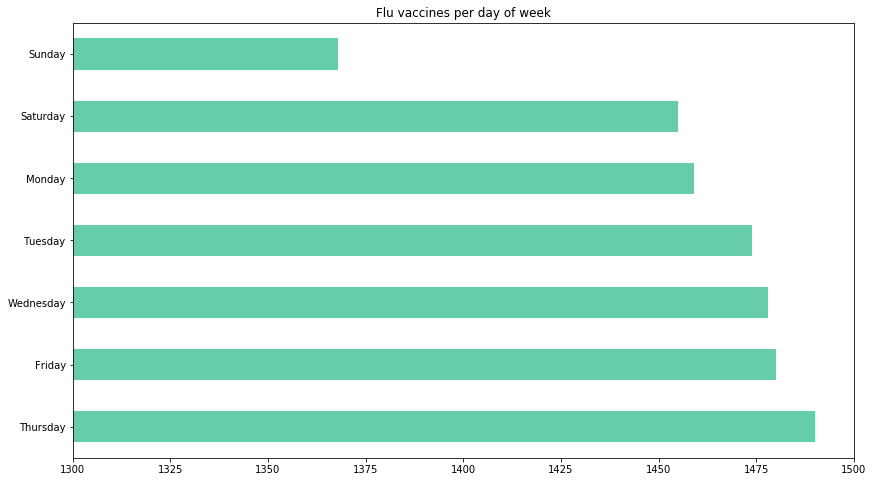

In [159]:
plt.figure(figsize=(14, 8))
count_per_day.plot(kind='barh', color='mediumaquamarine', xlim=[1300, 1500])
plt.title('Flu vaccines per day of week')
plt.show()


## 3.2 Overall flu vaccines over time

It would be interesting to see if the amount of flu vaccines changed over the years

In [162]:
flu_clinics.Season.unique()

array(['2015-2016', '2018-2019', '2017-2018', '2014-2015', '2019-2020',
       '2016-2017'], dtype=object)

In [182]:
count_per_season = flu_clinics.Season.value_counts() 
count_per_season = count_per_season.sort_index()
count_per_season

2014-2015    332
2015-2016    342
2016-2017    299
2017-2018    297
2018-2019    288
2019-2020    304
Name: Season, dtype: int64

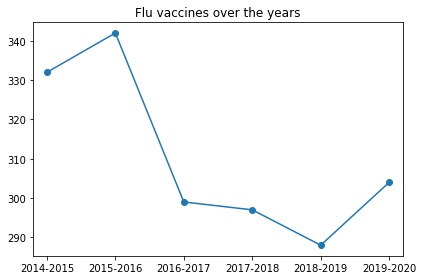

In [183]:
count_per_season.plot(kind='line', marker='o', xlim=[-0.2, 5.2])
plt.title('Flu vaccines over the years')
plt.tight_layout()
plt.show()

As we can see, they are less and less flu vaccines over the year with a slight augmentation in 2019-2020

### 3.2 Flu vaccines location

In [188]:
import seaborn as sns

Let us look at the distribution of the clinics who gave flu vaccinations in Chicago and see if we can get some insight from it

Here is the map of Chicago : 

![Chicago Map](data/chicagomap.png)

As for the locations :

In [201]:
data = flu_clinics[['Latitude', 'Longitude']]

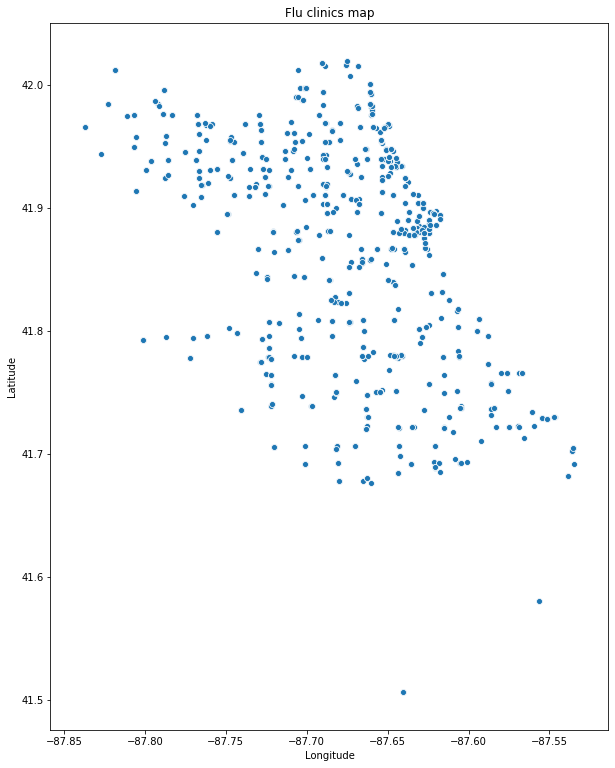

In [205]:
plt.figure(figsize=(10, 13))
sns.scatterplot(x='Longitude', y='Latitude', data = data)
plt.title('Flu clinics map')
plt.show()

We can clearly see that there is bigger amount of clinics that gave flu vaccines closer to the lake, otherwise it looks like i is uniformly distributed